# 100. REGRESION LOGISTICA 

Imaginar la situacion de un dataset de cierto supermercado, sobre el genero de un cliente y si una persona a comprado o no un 
producto determinado, nos interesan las opciones de compra de un cliente aletorio. 
¿Cual es la probabilidad de que un cliente compre cierto prdocuto sabiendo que es hombre o que es mujer ? 

## LAS TABLAS DE CONTIGENCIA 



In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/gender-purchase/Gender Purchase.csv")

In [4]:
df.head()
#2da columna menciona si la persona ha hecho o no, la compra. 

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [8]:
df.shape #Tenemos una informacion que es muy simple, es informacion binaria. 

(511, 2)

Queremos hacer una tabla de contingencia, que es una repre de las frecuencias de las observaciones que caen dentro de las 
diversas categorias para dos o mas variables. 


In [10]:
#Hacer una tabla de contingencias. 
contingence_table = pd.crosstab(df["Gender"] , df["Purchase"])
contingence_table #El total de hombres y mujeres que compraron o no algo. 

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [12]:
contingence_table.sum(axis = 1) 

Gender
Female    265
Male      246
dtype: int64

In [13]:
contingence_table.sum(axis = 0)  #Sumar Verticalmente

Purchase
No     231
Yes    280
dtype: int64

In [14]:
#Podemos calcular las proporciones de mujeres y hombres que compraron algo o no. 
contingence_table.astype("float").div(contingence_table.sum(axis = 1), axis = 0)
#Lo que se hace es dividir cada una de las filas, por la suma total. 
#cada fila suma 100%. 

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


# 101. PROBABILIDADES CONDICIONALES 

Las cuestiones de compra siendo Hombre o Mujer estan relacionadas con la probabilidad condicional. 
* ¿Cual es la probabilidad de que un cliente compre un producto si es un hombre ? 
* ¿Cual es la probabilidad de que sabiendo que un cliente comnpra un producto sea mujer?


In [21]:
#En nuestro dataframe, ¿ Cual es la probabilidad de que siendo hombre, compre ? 
#Usando probabilidad condicional. 
#Numero Total de compras hechas por hombres / Numero Total de hombres del grupo 
121 / 246

0.491869918699187

In [22]:
#¿ Cual es la probabilidad de que sabiendo que se ha hecho una compra, esta haya sido por una mujer ? 
#Usando probabilidad condional. 
#Numero total de compras hechas por mujeres \ Numero total de compras. 
159 / 280

0.5678571428571428

# 102. COCIENTE DE PROBABILIDADES

Conocido como el ratio de probabilidades. \
Se define como el cociente de las probabilidades de exito entre las probabilidades de fracaso. 
* $P_{m}$ = Probabilidad de hacer una compra sabiendo que es un hombre. 
* $P_{f}$  = Probabilidad de hacer una compra sabiendo que es una mujer.
- $\frac{P_{m}}{1 - P_{m}}$
- $\frac{P_{f}}{1 - P_{f}}$

In [24]:
pm = 121  / 246 
pf = 159 / 265 
ratio_m = pm / (1-pm)
ratio_f = pf / (1-pf)
ratio_m, ratio_f

(0.9680000000000002, 1.4999999999999998)

Cuanto mas grande sea el ratio, entonces el numerador de la fraccion seria mas grande, que seria la probabilidad de exito. 
$$ratio \in [0,\infty)$$ 
Todos son puntos fundamentales de la regresion logistica. 

# 103. DE LA REGRESION LINEAL A LA LOGISTICA 

El modelo de regresion lineal, recordemos que es del estilo: 
- $y = a + b * x$  con $(x,y) \in [-\infty, \infty]^2$ \
En el caso de la Regresion Logistica, la primera diferencia con la que nos encontraremos, es que la variable "y" ya no puede ser continua, debe de ser discreta, solo puede tomar el valor 0 o 1, variable binaria. \
Tomando de esta manera $ y \in (0,1)$ discreto. \
El punto de partida basico para la regresion logistica, sera calcula la $P$ usando la ecuacion $P= a + b*X$. \
- $P = $ Probabilidad condicionada de exito o fracaso  a la presencia de la variable X. 

# 105. CREAR UN MODELO LOGISTICO DESDE CERO. 

Crearemos todo el codigo, para demostrar de forma de codigo.
## Definiremos una serie de funciones.
### Definir la funcion de entorno 

In [2]:
from IPython.display import display, Math, Latex 

In [5]:
display(Math(r'L(\beta) = \sum_{i=1}^n P_i^{y_i}{i - Pi}^{1- y_i}'))

<IPython.core.display.Math object>

In [58]:
def likelihood(y, pi): 
    import numpy as np
    total_sum = 1 
    sum_in = list(range(1, len(y)+1))
    for i in range(len(y)):
        sum_in[i] = np.where(y[i] ==1, pi[i], 1-pi[i])
        total_sum = total_sum * sum_in[i]
        return total_sum

### Calcular las probabilidades para cada observacion 

In [8]:
display(Math(r'P_i = P(x_i) = \frac{1}{1 + e^{-\beta\cdot x_i}}'))

<IPython.core.display.Math object>

In [47]:
def logitprobs(X, beta): 
    import numpy as np 
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi = list(range(1, n_rows + 1))
    expon = list(range(1, n_rows + 1))
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols): 
            ex = X[i][j] * beta[j]
            expon[i] = ex + expon[i]
        with np.errstate(divide = "ignore", invalid = "ignore"):
            pi[i] = 1 / (1+np.exp(-expon[i]))
    return pi

### CALCULAR LA MATRIZ DIAGONAL W

In [12]:
display(Math(r' W= diag(P_i \cdot (i-P_i)_{i=1}^n)'))

<IPython.core.display.Math object>

In [49]:
def findW(pi):
    import numpy as np 
    n = len(pi)
    W = np.zeros(n*n).reshape(n,n)
    for i in range(n):
        print(i)
        W[i,i] = pi[i]*(1 - pi[i])
        W[i,i].astype(float)
    return W

### OBTENER LA SOLUCION DE  LA FUNCION LOGISTICA 


In [18]:
display(Math(r"\beta_{n+1} = \beta_n -\frac{f(\beta_n)}{f'(\beta_n)}"))

<IPython.core.display.Math object>

In [51]:
def logistics(X, Y, limit):
    import numpy as np
    from numpy import linalg
    nrows = np.shape(X)[0]
    bias = np.ones(nrows).reshape(nrows,1)
    X_new = np.append(X, bias, axis = 1)
    ncol = np.shape(X_new)[1]
    beta = np.zeros(ncol).reshape(ncol,1)
    root_dif = np.array(range(1, ncol+1)).reshape(ncol, 1)
    iter_i = 10000
    while(iter_i > limit):
        print(str(iter_i) + "," + str(limit))
        pi = logitprobs(X_new, beta)
        print(pi)
        W = findW(pi)
        print(W)
        num = (np.transpose(np.matrix(X_new)) * np.matrix(Y - np.transpose(pi)).transpose())
        den = (np.matrix(np.transpose(X_new)) * np.matrix(W) * np.matrix(X_new))
        root_dif = np.array(linalg.inv(den) * num)
    
        beta = beta + root_dif
        print(beta)
        iter_i = np.sum(root_dif * root_dif)
        print(iter_i)
        ll = likelihood(Y, pi)
    return beta

### COMPROBACION EXPERIMENTAL

In [23]:
import numpy as np 

In [24]:
X = np.array(range(10)).reshape(10,1)

In [25]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [27]:
Y = [0,0,0,0,1,0,1,0,1,1]

In [28]:
bias = np.ones(10).reshape(10,1)
X_new = np.append(X, bias, axis = 1)

In [29]:
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [59]:
a = logistics(X,Y,0.00001)}

10000,1e-05
[array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5])]
0
1
2
3
4
5
6
7
8
9
[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
[[ 0.43636364]
 [-2.36363636]]
5.777190082644626
5.777190082644626,1e-05
[array([0.08598797]), array([0.12705276]), array([0.18378532]), array([0.2583532]), array([0.35019508]), array([0.45467026]), array([0.56329497]), array([0.66616913]), array([0.75533524]), array([0.82687453])]
0
1
2
3
4
5
6

Con el paquete Statsmodel de python.

In [61]:
import statsmodels.api as sm

In [63]:
logit_model = sm.Logit(Y,X_new)

In [64]:
result = logit_model.fit()
#Ha hecho 6 iteraciones 

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [65]:
print(result.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.360   
Dependent Variable: y                AIC:              12.6202 
Date:               2021-04-04 01:42 BIC:              13.2254 
No. Observations:   10               Log-Likelihood:   -4.3101 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.027807
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.6622     0.4001    1.6551   0.0979   -0.1220   1.4464
const    -3.6956     2.2889   -1.6145   0.1064   -8.1818   0.7906



# 106. ANALISIS EXPLORATORIO DE LOS DATOS 

Utilizar dataset bancario e informaicon acerca de como el cliente y el banco se relacionan.

### REGRESION LOGISTICA PARA PREDICCIONES BANCARIAS 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/bank/bank.csv", sep = ";")

In [249]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [250]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [251]:
data["y"] = (data["y"] =="yes").astype(int) #Transformamos los "si"  a 1 y los "no" a 0

In [252]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [253]:
data["education"].unique() #Los valores unicos de dicho data frame. 

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [254]:
#usaremos numpy para hacer una restructuracion de esas categorias. 
#Lo que esta condicion hace es que los nombres correspondientes a "basic 4,6,9" pasaran a ser llamados simplemente "Basic" o 
#solo se quedaran como el mismo nombre 
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High.School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professiona Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [255]:
data["education"].unique() #Hemos cambiado los nombres de dicha variable, a nombres mas entendibles. 

array(['Basic', 'High.School', 'University Degree', 'Professiona Course',
       'Unknown', 'Illiterate'], dtype=object)

In [256]:
data["y"].value_counts() #Muchos usuarios del data set no compraron producto. 

0    3668
1     451
Name: y, dtype: int64

In [257]:
data.groupby("y").mean() 
#El promedio de edad de quien compra es mas alto de quien no compra. 
#

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [258]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High.School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professiona Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [259]:
#Podemos hacer un analisis grafico. 
%matplotlib inline

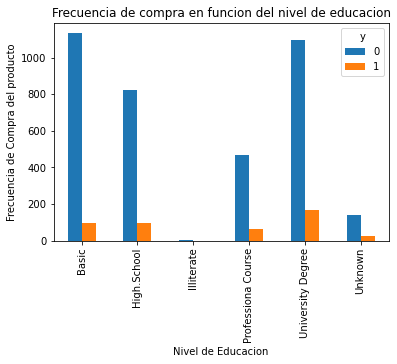

In [260]:
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de Educacion")
plt.ylabel("Frecuencia de Compra del producto")
print()
#Quienes mas comprar podemos ver que son las personas universitarias, 
#podemos ver que el nivel de educacion, es un buen predictor, si influye en si compra o no. 


Text(0, 0.5, 'Proporcion de clientes')

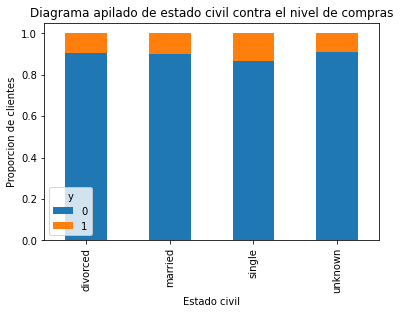

In [261]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")
#La frecuencia de compra, es la misma, el estado civil para predecir variables, es una cosa que no influye demasiado. 


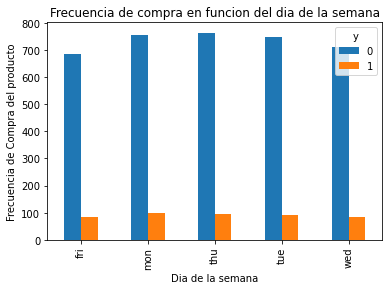

In [262]:
pd.crosstab(data.day_of_week, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de Compra del producto")
print()
#Tampoco vemos que tampoco hay mucha influencia en si alguien compra o no, respecto a cierto dia de la semana, todos los dias 
#practicamente se compra igual. 

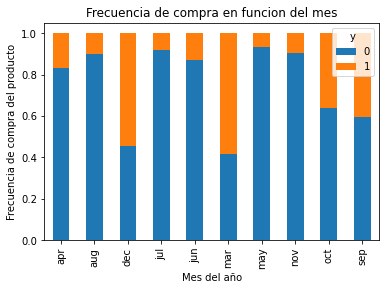

In [263]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
print() 
#Podemos ver que el mes, si podria ser un buen predictor. 

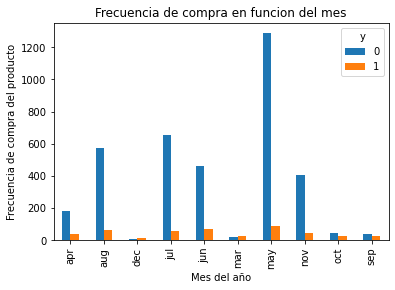

In [264]:
table = pd.crosstab(data.month, data.y)
table.plot(kind = "bar", stacked = False)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
print() 
#Vemos que mucha gente, rechaza los productos en mayo. esto es algo bastante importante. 

Text(0, 0.5, 'Cliente')

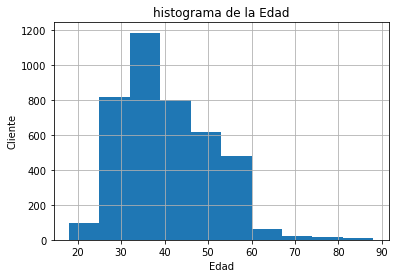

In [265]:
data.age.hist()
plt.title("histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")
#Tenemos la distribucion de la edad, la mayoria de la gente esta entre los 30 y 40. 
#Podemos pensar que la gente que tiene mas de 60, ya no piensa en invertir, piensa probablemente en la jubilacion, 
#menos de 25 tampoco, porque la mayoria de las personas no tienen dinero. 

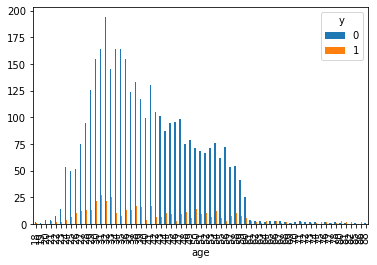

In [266]:
#Si queremos hacer una tabla cruzada y pintar un bar. 
pd.crosstab(data.age, data.y).plot(kind = "bar")
print()

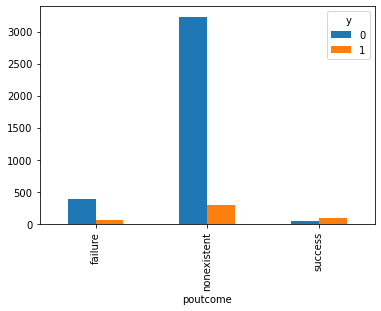

In [267]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")
print()
#Podemos checar que la gente que ha fracasado tienen mas tendencia a decir que no.
#si alguien ha tenido una mala experiencia en bolsa, no va a repeterir, aunque algunos dicen que si. 
#esta variable tambien es bueno para decidir si alguien va a llevar acabo una inversion. 



# 107. LA SELECCION DE VARIABLES DEL DATAFRAME

In [268]:
#Hay muchas variables categoricas en el dataframe, las convertiremos a variables dummy. 
#lo idea es crear un array de las variables categoricas a dummies, lo haremos de manera automatica con un bucle for. 

In [247]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
print(data)
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new


      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married              Basic      no      yes       no   
1      39     services   single        High.School      no       no       no   
2      25     services  married        High.School      no      yes       no   
3      38     services  married              Basic      no  unknown  unknown   
4      47       admin.  married  University Degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married              Basic      no      yes      yes   
4115   39       admin.  married        High.School      no      yes       no   
4116   27      student   single        High.School      no       no       no   
4117   58       admin.  married        High.School      no       no       no   
4118   34   management   single        High.School      no      yes       no   

        contact month day_of_week  ... 

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [245]:
 data.columns.values #Nos han salido muchas columnas. 

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High.School', 'education_Illiterate',
       'education_Professiona Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may'

In [278]:
#Podemos quitar las columnas originales. 
data_vars = data.columns.values.tolist

AttributeError: 'builtin_function_or_method' object has no attribute 'columns'

In [273]:
to_keep = [v for v in data_vars if v not in categories]


In [277]:
to_keep = [v for v in data_vars if v not in ["default"]]

TypeError: 'builtin_function_or_method' object is not iterable

In [274]:
#hacemos un subconjuto de los datos con los que nos queremos quedar. 
bank_data = data[to_keep]
bank_data.columns.values #El nombre de las columnas con las que me quedo. 
#han desaparecido todas aquellas de las que he creado la variable dummy. 

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [192]:
#la variable a predecir es "y", entonces separaremos el dataset en dos trozos. 
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### SELECCION DE RASGOS PARA EL MODELO 
Es para decidir cuales de todas las variables son aquellas mas significativas para predecir el valor de salida del modelo, tenemos eleccion para elegir las variables que queramos. 

In [202]:
n = 12 

In [194]:
from sklearn import datasets
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

In [214]:
lr = LogisticRegression()

In [215]:
rfe = RFE(lr,n_features_to_select = 12)

In [216]:
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

ValueError: could not convert string to float: 'blue-collar'

In [217]:
print(rfe.support_)

AttributeError: 'RFE' object has no attribute 'support_'

## PENDIENTE
### COMPLEMENTADO CON EL SCRIPT T5 - 3- LOGISTRIC REGRESSION